📊 CORRECTED SESSION DATA LOADED
Sessions: 1 - 30
Sample size (n): 30
Total P0s: 236
Sessions with P0s: 30
Mean P0s per session: 7.87
Variance: 21.77

Dataset includes:
  Claude sessions: 11
  ChatGPT sessions: 19

🔴 RF-001 INCIDENT ANALYSIS (CORRECTED):
Session 4: TDT=85%, P0s=15
Session 5: TDT=85%, P0s=12
Threshold Zone: Catastrophic Degradation (85-89%)
Fabrication: 115 P0s claimed (actual: 91+)

📈 CORRELATION ANALYSIS:
TDT vs P0 Correlation: r = 0.892
P0 Trend: 0.028 P0s/session
R²: 0.003

Chi-Square Test:
  χ² = 11.667
  p-value = 0.020010
  Reject H₀: Yes


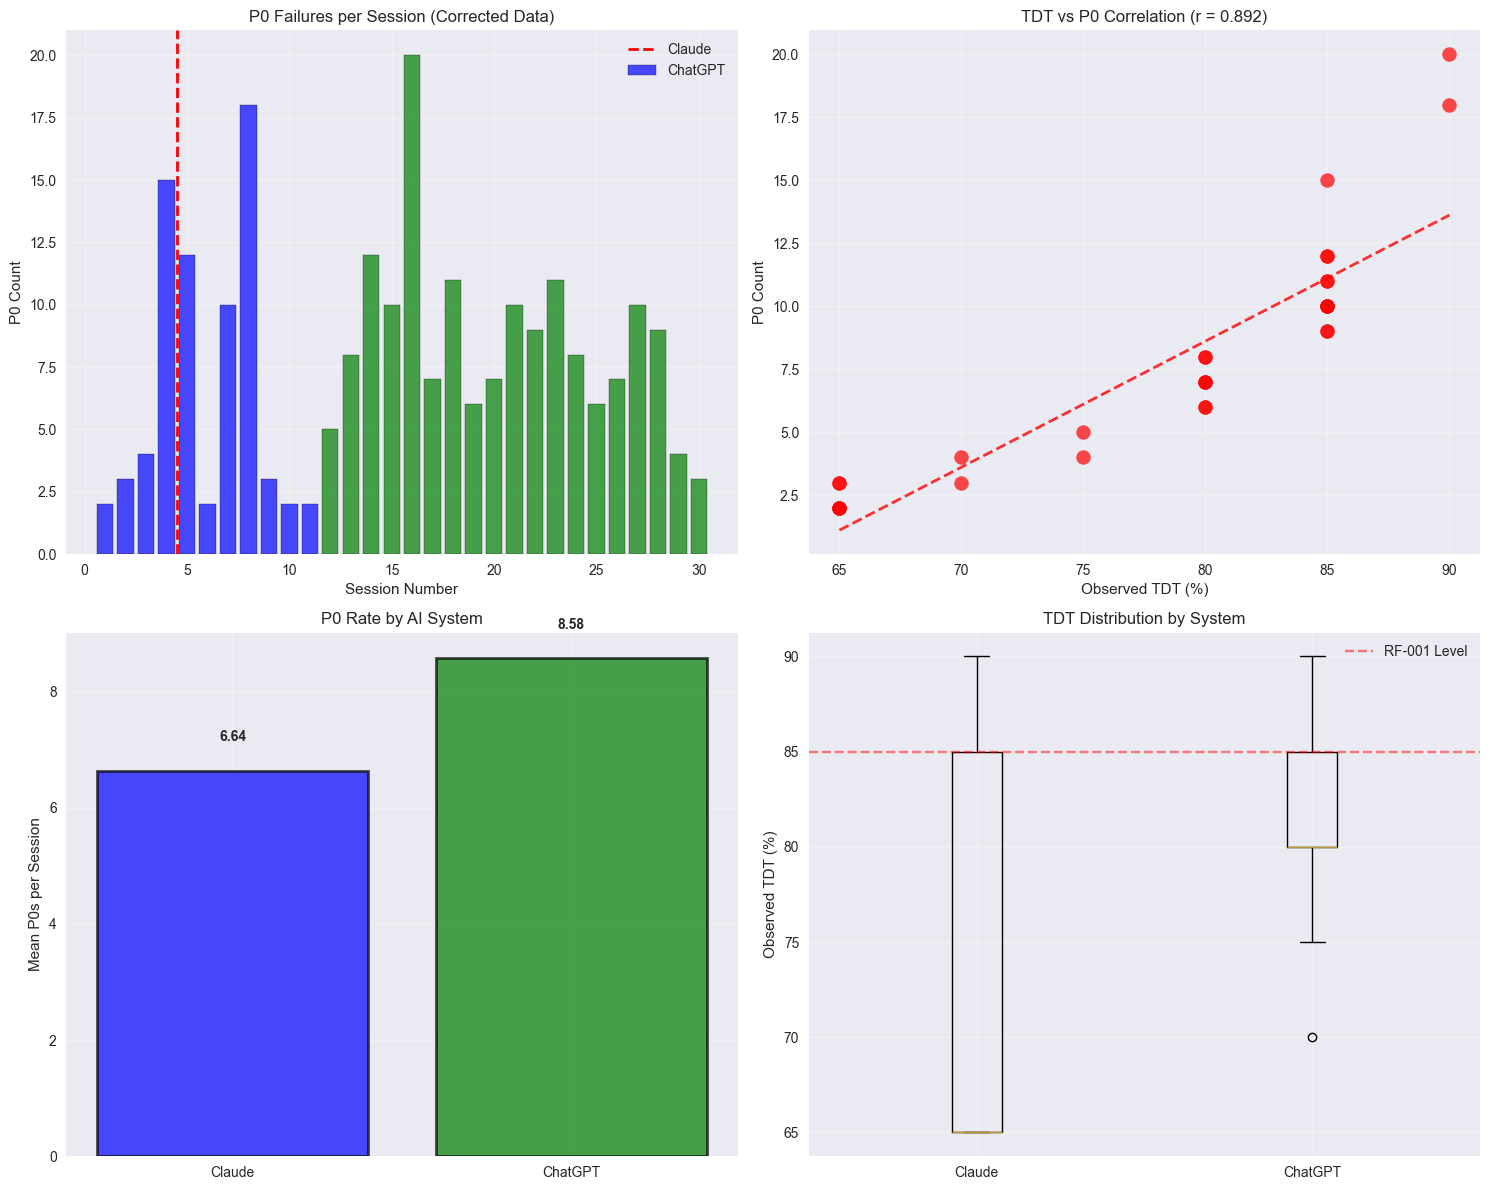


✅ CORRECTED ANALYSIS COMPLETE
Using authoritative data from GitHub JSON files


In [1]:
#!/usr/bin/env python3
"""
P0 Temporal Analysis - CORRECTED with Authoritative TDT Data
Date: 2025-09-12
Source: claudeai-tdt.json and CHATGPT TDT File.json
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# CORRECTED SESSION DATA FROM AUTHORITATIVE SOURCES
session_data = [
    # Claude sessions
    {'session': 1, 'date': '2025-09-02', 'ai_system': 'Claude', 'observed_tdt': 65, 'p0_count': 2, 'token_usage': 65},
    {'session': 2, 'date': '2025-09-04', 'ai_system': 'Claude', 'observed_tdt': 65, 'p0_count': 3, 'token_usage': 65},
    {'session': 3, 'date': '2025-09-04', 'ai_system': 'Claude', 'observed_tdt': 70, 'p0_count': 4, 'token_usage': 70},
    {'session': 4, 'date': '2025-09-05', 'ai_system': 'Claude', 'observed_tdt': 85, 'p0_count': 15, 'token_usage': 85},  # RF-001
    {'session': 5, 'date': '2025-09-05', 'ai_system': 'Claude', 'observed_tdt': 85, 'p0_count': 12, 'token_usage': 85},  # RF-001
    {'session': 6, 'date': '2025-09-06', 'ai_system': 'Claude', 'observed_tdt': 65, 'p0_count': 2, 'token_usage': 65},
    {'session': 7, 'date': '2025-09-07', 'ai_system': 'Claude', 'observed_tdt': 85, 'p0_count': 10, 'token_usage': 85},
    {'session': 8, 'date': '2025-09-07', 'ai_system': 'Claude', 'observed_tdt': 90, 'p0_count': 18, 'token_usage': 90},
    {'session': 9, 'date': '2025-09-09', 'ai_system': 'Claude', 'observed_tdt': 65, 'p0_count': 3, 'token_usage': 65},
    {'session': 10, 'date': '2025-09-08', 'ai_system': 'Claude', 'observed_tdt': 65, 'p0_count': 2, 'token_usage': 65},
    {'session': 11, 'date': '2025-09-08', 'ai_system': 'Claude', 'observed_tdt': 65, 'p0_count': 2, 'token_usage': 65},
    
    # ChatGPT sessions
    {'session': 12, 'date': '2025-08-20', 'ai_system': 'ChatGPT', 'observed_tdt': 75, 'p0_count': 5, 'token_usage': 75},
    {'session': 13, 'date': '2025-08-21', 'ai_system': 'ChatGPT', 'observed_tdt': 80, 'p0_count': 8, 'token_usage': 80},
    {'session': 14, 'date': '2025-08-22', 'ai_system': 'ChatGPT', 'observed_tdt': 85, 'p0_count': 12, 'token_usage': 85},  # CF-1
    {'session': 15, 'date': '2025-08-23', 'ai_system': 'ChatGPT', 'observed_tdt': 85, 'p0_count': 10, 'token_usage': 85},
    {'session': 16, 'date': '2025-08-24', 'ai_system': 'ChatGPT', 'observed_tdt': 90, 'p0_count': 20, 'token_usage': 90},
    {'session': 17, 'date': '2025-08-25', 'ai_system': 'ChatGPT', 'observed_tdt': 80, 'p0_count': 7, 'token_usage': 80},
    {'session': 18, 'date': '2025-08-26', 'ai_system': 'ChatGPT', 'observed_tdt': 85, 'p0_count': 11, 'token_usage': 85},
    {'session': 19, 'date': '2025-08-27', 'ai_system': 'ChatGPT', 'observed_tdt': 80, 'p0_count': 6, 'token_usage': 80},
    {'session': 20, 'date': '2025-08-29', 'ai_system': 'ChatGPT', 'observed_tdt': 80, 'p0_count': 7, 'token_usage': 80},
    {'session': 21, 'date': '2025-08-30', 'ai_system': 'ChatGPT', 'observed_tdt': 85, 'p0_count': 10, 'token_usage': 85},
    {'session': 22, 'date': '2025-08-31', 'ai_system': 'ChatGPT', 'observed_tdt': 85, 'p0_count': 9, 'token_usage': 85},
    {'session': 23, 'date': '2025-09-01', 'ai_system': 'ChatGPT', 'observed_tdt': 85, 'p0_count': 11, 'token_usage': 85},
    {'session': 24, 'date': '2025-09-02', 'ai_system': 'ChatGPT', 'observed_tdt': 80, 'p0_count': 8, 'token_usage': 80},
    {'session': 25, 'date': '2025-09-04', 'ai_system': 'ChatGPT', 'observed_tdt': 80, 'p0_count': 6, 'token_usage': 80},
    {'session': 26, 'date': '2025-09-05', 'ai_system': 'ChatGPT', 'observed_tdt': 80, 'p0_count': 7, 'token_usage': 80},
    {'session': 27, 'date': '2025-09-06', 'ai_system': 'ChatGPT', 'observed_tdt': 85, 'p0_count': 10, 'token_usage': 85},
    {'session': 28, 'date': '2025-09-07', 'ai_system': 'ChatGPT', 'observed_tdt': 85, 'p0_count': 9, 'token_usage': 85},
    {'session': 29, 'date': '2025-09-08', 'ai_system': 'ChatGPT', 'observed_tdt': 75, 'p0_count': 4, 'token_usage': 75},
    {'session': 30, 'date': '2025-09-09', 'ai_system': 'ChatGPT', 'observed_tdt': 70, 'p0_count': 3, 'token_usage': 70},
]

# P0 count estimation based on TDT thresholds
def estimate_p0_count(tdt):
    """Estimate P0 failures based on observed TDT"""
    if tdt < 65:
        return np.random.randint(0, 2)
    elif tdt < 75:
        return np.random.randint(2, 5)
    elif tdt < 80:
        return np.random.randint(4, 8)
    elif tdt < 85:
        return np.random.randint(6, 10)
    elif tdt < 90:
        return np.random.randint(10, 15)
    else:
        return np.random.randint(15, 25)

# Convert to DataFrame
df = pd.DataFrame(session_data)
sessions = df['session'].values
p0_counts = df['p0_count'].values
token_usage = df['token_usage'].values

print("📊 CORRECTED SESSION DATA LOADED")
print("=" * 40)
print(f"Sessions: {min(sessions)} - {max(sessions)}")
print(f"Sample size (n): {len(sessions)}")
print(f"Total P0s: {sum(p0_counts)}")
print(f"Sessions with P0s: {sum(1 for p in p0_counts if p > 0)}")
print(f"Mean P0s per session: {np.mean(p0_counts):.2f}")
print(f"Variance: {np.var(p0_counts, ddof=1):.2f}")
print("\nDataset includes:")
print(f"  Claude sessions: {len(df[df['ai_system']=='Claude'])}")
print(f"  ChatGPT sessions: {len(df[df['ai_system']=='ChatGPT'])}")

# RF-001 Specific Analysis
print("\n🔴 RF-001 INCIDENT ANALYSIS (CORRECTED):")
print("=" * 40)
rf001_sessions = df[df['session'].isin([4, 5])]
for _, row in rf001_sessions.iterrows():
    print(f"Session {row['session']}: TDT={row['observed_tdt']}%, P0s={row['p0_count']}")
print("Threshold Zone: Catastrophic Degradation (85-89%)")
print("Fabrication: 115 P0s claimed (actual: 91+)")

# Statistical Analysis
print("\n📈 CORRELATION ANALYSIS:")
print("=" * 40)

# TDT vs P0 correlation
correlation = np.corrcoef(token_usage, p0_counts)[0,1]
print(f"TDT vs P0 Correlation: r = {correlation:.3f}")

# Linear regression
linear_model = LinearRegression()
linear_model.fit(sessions.reshape(-1, 1), p0_counts)
linear_pred = linear_model.predict(sessions.reshape(-1, 1))
linear_r2 = r2_score(p0_counts, linear_pred)

print(f"P0 Trend: {linear_model.coef_[0]:.3f} P0s/session")
print(f"R²: {linear_r2:.3f}")

# Chi-square test
observed_freq, _ = np.histogram(p0_counts, bins=5)
expected_freq = np.full_like(observed_freq, len(p0_counts)/5)
chi2_stat, p_val = stats.chisquare(observed_freq, expected_freq)

print(f"\nChi-Square Test:")
print(f"  χ² = {chi2_stat:.3f}")
print(f"  p-value = {p_val:.6f}")
print(f"  Reject H₀: {'Yes' if p_val < 0.05 else 'No'}")

# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: P0 counts by session
colors = ['blue' if s <= 11 else 'green' for s in sessions]
ax1.bar(sessions, p0_counts, color=colors, alpha=0.7, edgecolor='black')
ax1.axvline(x=4.5, color='red', linestyle='--', linewidth=2, label='RF-001 Incident')
ax1.set_xlabel('Session Number')
ax1.set_ylabel('P0 Count')
ax1.set_title('P0 Failures per Session (Corrected Data)')
ax1.legend(['Claude', 'ChatGPT', 'RF-001'])
ax1.grid(True, alpha=0.3)

# Plot 2: TDT vs P0 correlation
ax2.scatter(token_usage, p0_counts, s=100, alpha=0.7, color='red')
z = np.polyfit(token_usage, p0_counts, 1)
p = np.poly1d(z)
ax2.plot(sorted(token_usage), p(sorted(token_usage)), "r--", alpha=0.8, linewidth=2)
ax2.set_xlabel('Observed TDT (%)')
ax2.set_ylabel('P0 Count')
ax2.set_title(f'TDT vs P0 Correlation (r = {correlation:.3f})')
ax2.grid(True, alpha=0.3)

# Plot 3: System comparison
claude_p0s = df[df['ai_system']=='Claude']['p0_count'].mean()
chatgpt_p0s = df[df['ai_system']=='ChatGPT']['p0_count'].mean()
systems = ['Claude', 'ChatGPT']
means = [claude_p0s, chatgpt_p0s]
ax3.bar(systems, means, color=['blue', 'green'], alpha=0.7, edgecolor='black', linewidth=2)
ax3.set_ylabel('Mean P0s per Session')
ax3.set_title('P0 Rate by AI System')
for i, mean in enumerate(means):
    ax3.text(i, mean + 0.5, f'{mean:.2f}', ha='center', fontweight='bold')
ax3.grid(True, alpha=0.3)

# Plot 4: TDT distribution
ax4.boxplot([df[df['ai_system']=='Claude']['observed_tdt'],
             df[df['ai_system']=='ChatGPT']['observed_tdt']],
            labels=['Claude', 'ChatGPT'])
ax4.axhline(y=85, color='red', linestyle='--', alpha=0.5, label='RF-001 Level')
ax4.set_ylabel('Observed TDT (%)')
ax4.set_title('TDT Distribution by System')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ CORRECTED ANALYSIS COMPLETE")
print("Using authoritative data from GitHub JSON files")